In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from __future__ import division   

In [3]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [ ]:
# open and display images - 860 nm focus

nodoe_437 = img.imread('transmission_noDOE/437.1_noDOE.bmp')
plt.imshow(doe_437)
plt.colorbar()
plt.title('437.1 nm focus without DOE')
plt.show()


doe1 = img.imread('transmission_DOE/437.1_DOE_1.bmp')
doe2 = img.imread('transmission_DOE/437.1_DOE_2.bmp')
doe3 = img.imread('transmission_DOE/437.1_DOE_3.bmp')
avg = sum([doe1,doe2,doe3])/3
plt.imshow(avg)
plt.colorbar()
plt.title('437.1 nm focus with DOE')
plt.show()

# calculate and print transmission
T = np.amax(avg)/np.amax(nodoe_437)*100
print('\nTransmission at 437.1 nm:\n')
print(T,'%')

## 3 Images per focal plane

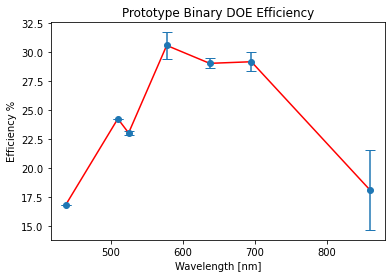

In [19]:
cwl = [437.1,509.4,524.4,577.3,637,695,860]
trans = []
T_std = []

for i in range(len(cwl)):
    img_noDOE = img.imread(f'transmission_noDOE/{cwl[i]}_noDOE.bmp')
    noDOE_max = np.amax(img_noDOE)
    
    img_DOE1 = img.imread(f'transmission_DOE/{cwl[i]}_DOE_1.bmp')
    img_DOE2 = img.imread(f'transmission_DOE/{cwl[i]}_DOE_2.bmp')
    img_DOE3 = img.imread(f'transmission_DOE/{cwl[i]}_DOE_3.bmp')
    DOE_max1 = np.amax(img_DOE1)
    DOE_max2 = np.amax(img_DOE2)  
    DOE_max3 = np.amax(img_DOE3)
    
    avg = (DOE_max1+DOE_max2+DOE_max3)/3 # find average of DOE maxes 
    
    T = avg / noDOE_max * 100 # find average transmission
    trans.append(T)
    
    std = ((np.std([DOE_max1,DOE_max2,DOE_max3]))/avg)*T
    
    T_std.append(std)     

plt.errorbar(cwl,trans, yerr = T_std,fmt = 'o', capsize = 5)
trans_av = movingaverage(trans, 1)
plt.plot(cwl, trans_av,"r")
plt.title('Prototype Binary DOE Efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()

In [20]:
type(img_noDOE)


numpy.ndarray

In [22]:
coords = np.where(img_DOE1 == np.amax(img_DOE1))
img_DOE1[coords]
type(coords)

tuple

## One image at each focal plane - 3/30 run

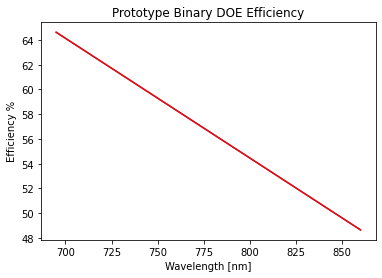

In [53]:
cwl = [695,860]
trans = []
N_pix = 25

for i in range(len(cwl)):
    img_noDOE = img.imread(f'3_30/{cwl[i]}_noDFL.bmp')
    img_DOE = img.imread(f'3_30/{cwl[i]}_DFL.bmp')
    
    T_filter = []
    noDOE = []
    
    for l in range(N_pix):
        noDOE_max = np.amax(img_noDOE)
        noDOE.append(noDOE_max)
        coords_noDOE = np.where(img_noDOE == noDOE_max,0,img_noDOE)
        img_noDOE = coords_noDOE
        
        bright_pixel = np.amax(img_DOE)
        T_filter.append(bright_pixel)
        coords_DOE = np.where(img_DOE == bright_pixel,0,img_DOE)
        T_filter.append(bright_pixel)
        img_DOE = coords_DOE
   
    avg = np.sum(T_filter)/len(T_filter)
    noDOE_avg = np.sum(noDOE)/len(noDOE)
    T = avg / noDOE_avg * 100 # find average transmission
    trans.append(T)
    img_noDOE = coords_noDOE
    img_DOE = coords_DOE
     
trans_av = movingaverage(trans, 1)
plt.plot(cwl,trans)
plt.plot(cwl,trans_av,"r")
plt.title('Prototype Binary DOE Efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()

In [52]:
cwl, trans

([695, 860], [61.33828996282528, 43.91143911439114])

## 90 , 95, 100 BD DFL Transmissions

[41, 41]
[134]
[71, 71]
[110]
[33, 33]
[58]
[51, 51]
[78]
[72, 72]
[143]
[47, 47]
[82]


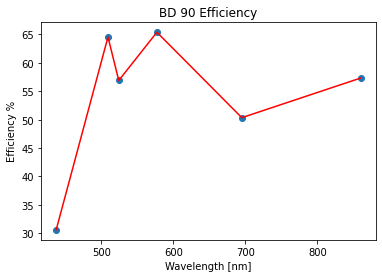

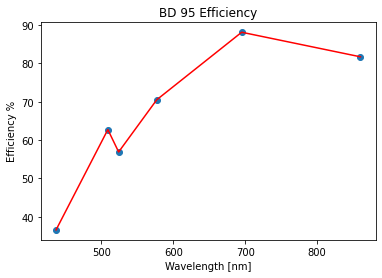

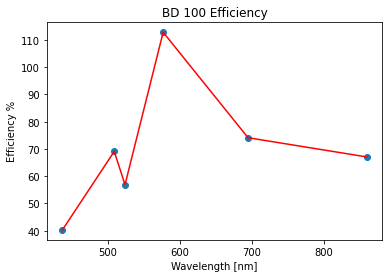

In [28]:
cwl = [437,509,524,577,695,860] # 524
trans_90 = []
trans_95 = []
trans_100 = []
N_pix = 1

for i in range(len(cwl)):
    img_noDOE = img.imread(f'E/{cwl[i]}_noDFL.bmp')
    img_DOE = img.imread(f'E/{cwl[i]}_90DFL.bmp')
    
    T_filter = []
    noDOE = []
    
    for l in range(N_pix):
        noDOE_max = np.amax(img_noDOE)
        noDOE.append(noDOE_max)
        coords_noDOE = np.where(img_noDOE == noDOE_max,0,img_noDOE)
        img_noDOE = coords_noDOE
        
        bright_pixel = np.amax(img_DOE)
        T_filter.append(bright_pixel)
        coords_DOE = np.where(img_DOE == bright_pixel,0,img_DOE)
        T_filter.append(bright_pixel)
        img_DOE = coords_DOE
        
    print(T_filter)
    print(noDOE)
    avg = np.sum(T_filter)/len(T_filter)
    noDOE_avg = np.sum(noDOE)/len(noDOE)
    T = avg / noDOE_avg * 100 # find average transmission
    trans_90.append(T)
    img_noDOE = coords_noDOE
    img_DOE = coords_DOE
     
trans_av = movingaverage(trans_90, 1)
plt.plot(cwl,trans_90,'o')
plt.plot(cwl,trans_av,"r")
plt.title('BD 90 Efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()



for i in range(len(cwl)):
    img_noDOE = img.imread(f'E/{cwl[i]}_noDFL.bmp')
    img_DOE = img.imread(f'E/{cwl[i]}_95DFL.bmp')
    
    T_filter = []
    noDOE = []
    
    for l in range(N_pix):
        noDOE_max = np.amax(img_noDOE)
        noDOE.append(noDOE_max)
        coords_noDOE = np.where(img_noDOE == noDOE_max,0,img_noDOE)
        img_noDOE = coords_noDOE
        
        bright_pixel = np.amax(img_DOE)
        T_filter.append(bright_pixel)
        coords_DOE = np.where(img_DOE == bright_pixel,0,img_DOE)
        T_filter.append(bright_pixel)
        img_DOE = coords_DOE
   
    avg = np.sum(T_filter)/len(T_filter)
    noDOE_avg = np.sum(noDOE)/len(noDOE)
    T = avg / noDOE_avg * 100 # find average transmission
    trans_95.append(T)
    img_noDOE = coords_noDOE
    img_DOE = coords_DOE
     
trans_av = movingaverage(trans_95, 1)
plt.plot(cwl,trans_95,'o')
plt.plot(cwl,trans_av,"r")
plt.title('BD 95 Efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()




for i in range(len(cwl)):
    img_noDOE = img.imread(f'E/{cwl[i]}_noDFL.bmp')
    img_DOE = img.imread(f'E/{cwl[i]}_100DFL.bmp')
    
    T_filter = []
    noDOE = []
    
    for l in range(N_pix):
        noDOE_max = np.amax(img_noDOE)
        noDOE.append(noDOE_max)
        coords_noDOE = np.where(img_noDOE == noDOE_max,0,img_noDOE)
        img_noDOE = coords_noDOE
        
        bright_pixel = np.amax(img_DOE)
        T_filter.append(bright_pixel)
        coords_DOE = np.where(img_DOE == bright_pixel,0,img_DOE)
        T_filter.append(bright_pixel)
        img_DOE = coords_DOE
   
    avg = np.sum(T_filter)/len(T_filter)
    noDOE_avg = np.sum(noDOE)/len(noDOE)
    T = avg / noDOE_avg * 100 # find average transmission
    trans_100.append(T)
    img_noDOE = coords_noDOE
    img_DOE = coords_DOE
     
trans_av = movingaverage(trans_100, 1)
plt.plot(cwl,trans_100,'o')
plt.plot(cwl,trans_av,"r")
plt.title('BD 100 Efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()

In [8]:
trans_90

[21.40983606557377,
 60.204081632653065,
 14.695652173913043,
 57.63636363636363,
 46.482801363495504,
 50.0]

## COTS Transmission

In [67]:
file = np.loadtxt('wavelengths_vernier.txt')

file11 = np.loadtxt('nocots1_vernier.txt')
file12 = np.loadtxt('nocots2_vernier.txt')
file13 = np.loadtxt('nocots3_vernier.txt')

file21 = np.loadtxt('cots1_vernier.txt')
file22 = np.loadtxt('cots2_vernier.txt')
file23 = np.loadtxt('cots3_vernier.txt')

T = (file21 + file22 + file23)/(file11 + file12 + file13)*100


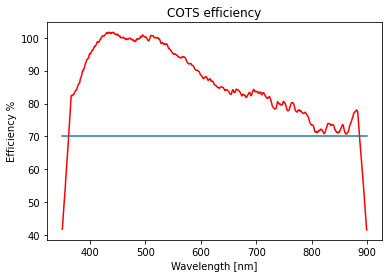

In [68]:
trans_av = movingaverage(T, 50)
TT = trans_av
plt.plot(file, TT,"r")
y = file1 * 0.7 / file1*100
plt.plot(file,y)
plt.title('COTS efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()

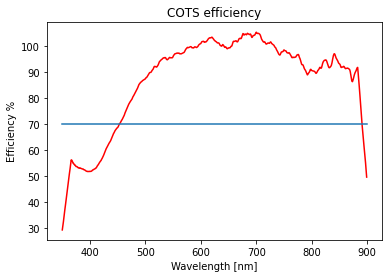

In [75]:
file = np.loadtxt('wavelengths_vernier.txt')

file11 = np.loadtxt('nocots11_vernier.txt')
file12 = np.loadtxt('nocots22_vernier.txt')
file13 = np.loadtxt('nocots33_vernier.txt')

file21 = np.loadtxt('cots11_vernier.txt')
file22 = np.loadtxt('cots22_vernier.txt')
file23 = np.loadtxt('cots33_vernier.txt')

T = (file21 + file22 + file23)/(file11 + file12 + file13)*100

trans_av = movingaverage(T, 50)
TT = trans_av
plt.plot(file, TT,"r")
y = file1 * 0.7 / file1*100
plt.plot(file,y)
plt.title('COTS efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()

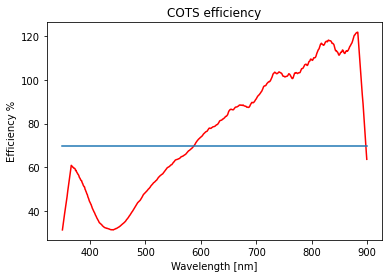

In [78]:
nocots = np.loadtxt('nocots.txt')
cots = np.loadtxt('cots.txt')
T = cots / nocots *100

trans_av = movingaverage(T, 50)
TT = trans_av
plt.plot(file, TT,"r")
y = file1 * 0.7 / file1*100
plt.plot(file,y)
plt.title('COTS efficiency')
plt.ylabel('Efficiency %')
plt.xlabel('Wavelength [nm]')
plt.show()